# Trabalho 

In [56]:
#Importando as Bibliotecas Necessária
import pandas as pd
import calendar
from datetime import datetime
import pyodbc
import os
import matplotlib.pyplot as plt
import pymannkendall as mk
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator


In [57]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()
print('Diretorio atual '+cwd)
#Estabelecendo a pasta de dados que quero utilizar
dataPath=os.path.dirname(cwd)+'\\dados_vazao'
print('Diretório de dados '+dataPath)

Diretorio atual C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\notebook
Diretório de dados C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados_vazao


In [58]:
#Lendo o arquivo vindo do Hidroweb
df = pd.read_csv(dataPath + '\\86510000_Vazoes.csv', header=11, sep=';', decimal=',', encoding='ISO-8859-1')
df

,EstacaoCodigo,NivelConsistencia,Data,Hora,MediaDiaria,MetodoObtencaoVazoes,Maxima,Minima,Media,DiaMaxima,...,Vazao22Status,Vazao23Status,Vazao24Status,Vazao25Status,Vazao26Status,Vazao27Status,Vazao28Status,Vazao29Status,Vazao30Status,Vazao31Status
0,86510000,1,01/03/2024,NaN,1,1,585.1611,87.1677,280.5209,10,...,NaN,1,1,1.0,1.0,1,1,1.0,1.0,1.0
1,86510000,1,01/02/2024,NaN,1,1,468.6241,115.7859,272.7540,17,...,1.0,1,1,1.0,1.0,1,1,NaN,0.0,0.0
2,86510000,1,01/01/2024,NaN,1,1,2005.1863,148.2521,445.7722,19,...,1.0,1,1,NaN,NaN,1,1,1.0,1.0,1.0
3,86510000,2,01/12/2023,NaN,1,1,1195.5500,121.4100,546.7200,5,...,1.0,1,1,1.0,1.0,1,1,1.0,1.0,1.0
4,86510000,2,01/11/2023,NaN,1,1,9401.0900,407.4500,1840.8700,18,...,1.0,1,1,1.0,1.0,1,1,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,86510000,2,01/05/1940,NaN,1,1,857.9781,91.2389,295.9834,3,...,1.0,1,1,1.0,1.0,1,1,1.0,1.0,1.0
1007,86510000,2,01/04/1940,NaN,1,1,1050.2300,218.4800,451.1600,26,...,1.0,1,1,1.0,1.0,1,1,1.0,1.0,NaN
1008,86510000,2,01/03/1940,NaN,1,1,392.2096,66.2033,142.6823,27,...,1.0,1,1,1.0,1.0,1,1,1.0,1.0,1.0
1009,86510000,2,01/02/1940,NaN,1,1,854.4158,137.6989,325.3061,20,...,1.0,1,1,1.0,1.0,1,1,1.0,NaN,NaN


In [59]:
#Filtrando apenas as colunas de interesse
lista_dados_vazoes = ['Data','Vazao01', 'Vazao02',
       'Vazao03', 'Vazao04', 'Vazao05', 'Vazao06', 'Vazao07', 'Vazao08',
       'Vazao09', 'Vazao10', 'Vazao11', 'Vazao12', 'Vazao13', 'Vazao14',
       'Vazao15', 'Vazao16', 'Vazao17', 'Vazao18', 'Vazao19', 'Vazao20',
       'Vazao21', 'Vazao22', 'Vazao23', 'Vazao24', 'Vazao25', 'Vazao26',
       'Vazao27', 'Vazao28', 'Vazao29', 'Vazao30', 'Vazao31', 'Vazao01Status',
       'EstacaoCodigo','NivelConsistencia']
lista_dados_vazoes

['Data',
 'Vazao01',
 'Vazao02',
 'Vazao03',
 'Vazao04',
 'Vazao05',
 'Vazao06',
 'Vazao07',
 'Vazao08',
 'Vazao09',
 'Vazao10',
 'Vazao11',
 'Vazao12',
 'Vazao13',
 'Vazao14',
 'Vazao15',
 'Vazao16',
 'Vazao17',
 'Vazao18',
 'Vazao19',
 'Vazao20',
 'Vazao21',
 'Vazao22',
 'Vazao23',
 'Vazao24',
 'Vazao25',
 'Vazao26',
 'Vazao27',
 'Vazao28',
 'Vazao29',
 'Vazao30',
 'Vazao31',
 'Vazao01Status',
 'EstacaoCodigo',
 'NivelConsistencia']

In [60]:
#Convertendo formato do arquivo de vazão

def convert_table_vazao(df_table_vazao):
    print('...convertendo formato')
    df_table_vazao['Data'] = pd.to_datetime(df_table_vazao['Data'], format='%d/%m/%Y')    
    df_table_vazao = df_table_vazao[lista_dados_vazoes]
    
    list_vazao = []
    list_data = []
    list_estacao = []
    list_consistencia = []
    
    for n in range(0,len(df_table_vazao)):

        year_info=df_table_vazao['Data'][n].year
        month_info=df_table_vazao['Data'][n].month   

        for day in range(0,calendar.monthrange(year_info, month_info)[1]):
                number = day +1
                if number <10:
                    name_col_vazao = 'Vazao0'+str(number)
                else:
                    name_col_vazao = 'Vazao'+str(number)
                    
                estacao = df_table_vazao.iloc[[n]]['EstacaoCodigo']
                vazao = df_table_vazao.iloc[[n]][name_col_vazao]
                consis = df_table_vazao.iloc[[n]]['NivelConsistencia']
                data=datetime(year_info, month_info, day+1)
                
                list_estacao.append(estacao.values[0])
                list_vazao.append(vazao.values[0])
                list_consistencia.append(consis.values[0])
                list_data.append(data)

    Tabela_Final=pd.DataFrame(list_data, columns=['Data'])
    Tabela_Final['EstacaoCodigo'] = list_estacao
    Tabela_Final['Vazao'] = list_vazao
    Tabela_Final['NivelConsistencia'] = list_consistencia
    Tabela_reorder=Tabela_Final.sort_values(by=['Data']).reset_index() 
    
    return Tabela_reorder

In [61]:
#Armazenando os resultados
df_corrigido=convert_table_vazao(df)

...convertendo formato


In [62]:
#Removendo os valores com NaN
vazao_diaria = df_corrigido.dropna(subset=['Vazao'])
print(vazao_diaria)
estacoes = vazao_diaria['EstacaoCodigo'].unique()
estacoes=str(estacoes[0])
print(estacoes)

       index       Data  EstacaoCodigo     Vazao  NivelConsistencia
0      30741 1940-01-01       86510000   94.3722                  2
1      30742 1940-01-02       86510000   89.6868                  2
2      30743 1940-01-03       86510000   83.5754                  2
3      30744 1940-01-04       86510000   77.6222                  2
4      30745 1940-01-05       86510000   79.0955                  2
...      ...        ...            ...       ...                ...
30767     26 2024-03-27       86510000  125.8903                  1
30768     27 2024-03-28       86510000  165.4455                  1
30769     28 2024-03-29       86510000  135.5116                  1
30770     29 2024-03-30       86510000   87.1677                  1
30771     30 2024-03-31       86510000  143.6383                  1

[30772 rows x 5 columns]
86510000


In [63]:
# Salva o DataFrame em um arquivo CSV
# Criando a pasta resultados
os.makedirs(os.path.dirname(cwd) +'\\resultados\\', exist_ok=True)
#Salvando na pasta
vazao_diaria.to_csv(os.path.dirname(cwd) +'\\resultados\\'+'vazao_'+str(estacoes)+'.csv')


In [64]:
# Extrair o ano da coluna de data, caso ainda não tenha a coluna "Ano"
vazao_diaria.loc[:,'Ano'] = vazao_diaria['Data'].dt.year

# Agrupar os dados por ano e calcular a média de vazão para cada ano
vazao_anual = vazao_diaria.groupby('Ano')['Vazao'].mean().reset_index()

# Exibir a tabela de vazão média anual
print(vazao_anual)

     Ano       Vazao
0   1940  393.858212
1   1941  543.798892
2   1942  238.690346
3   1943  151.050705
4   1944  144.842877
..   ...         ...
80  2020  272.886047
81  2021  252.583685
82  2022  370.843115
83  2023  676.717829
84  2024  334.340126

[85 rows x 2 columns]


In [65]:
#Calculando a vazão média mensal para cada mês de cada ano
# Criar novas colunas 'Ano' e 'Mes' usando .loc para evitar SettingWithCopyWarning
vazao_diaria = vazao_diaria.copy()
vazao_diaria.loc[:, 'Ano'] = vazao_diaria['Data'].dt.year
vazao_diaria.loc[:, 'Mes'] = vazao_diaria['Data'].dt.month

# Criar a nova coluna 'AnoMes' combinando 'Ano' e 'Mes'
vazao_diaria.loc[:, 'AnoMes'] = vazao_diaria.apply(lambda x: f"{x['Ano']}-{x['Mes']:02d}", axis=1)

# Agrupar os dados por AnoMes e calcular a média de vazão para cada mês de cada ano
vazao_mensal = vazao_diaria.groupby('AnoMes')['Vazao'].mean().reset_index()
vazao_mensal['Ano'] = vazao_mensal['AnoMes'].str.split('-').str[0]


# Verificar os dados agregados
print(vazao_mensal)

       AnoMes        Vazao   Ano
0     1940-01   323.579500  1940
1     1940-02   325.306066  1940
2     1940-03   142.682313  1940
3     1940-04   451.164177  1940
4     1940-05   295.983361  1940
...       ...          ...   ...
1006  2023-11  1840.865667  2023
1007  2023-12   546.724019  2023
1008  2024-01   445.772203  2024
1009  2024-02   272.753966  2024
1010  2024-03   280.520910  2024

[1011 rows x 3 columns]


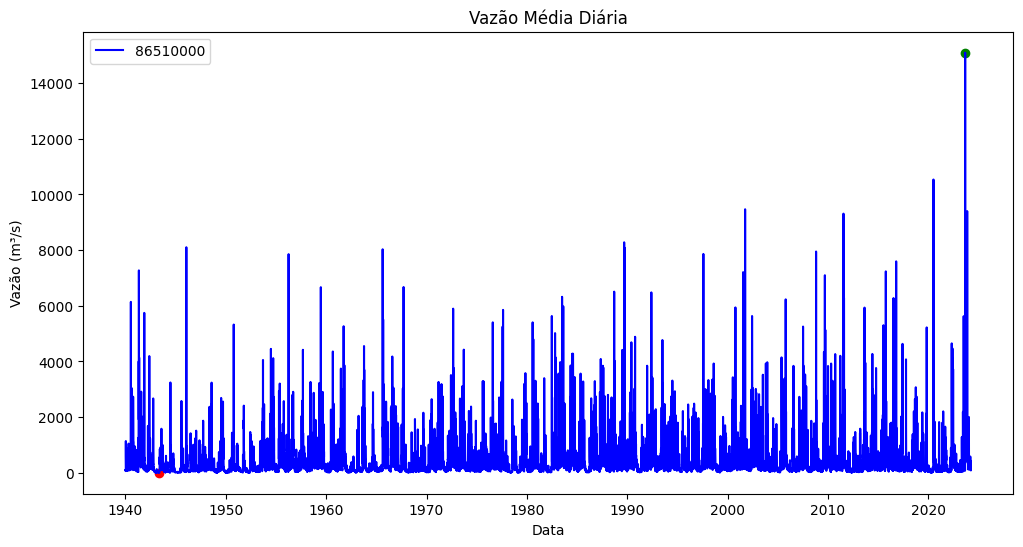

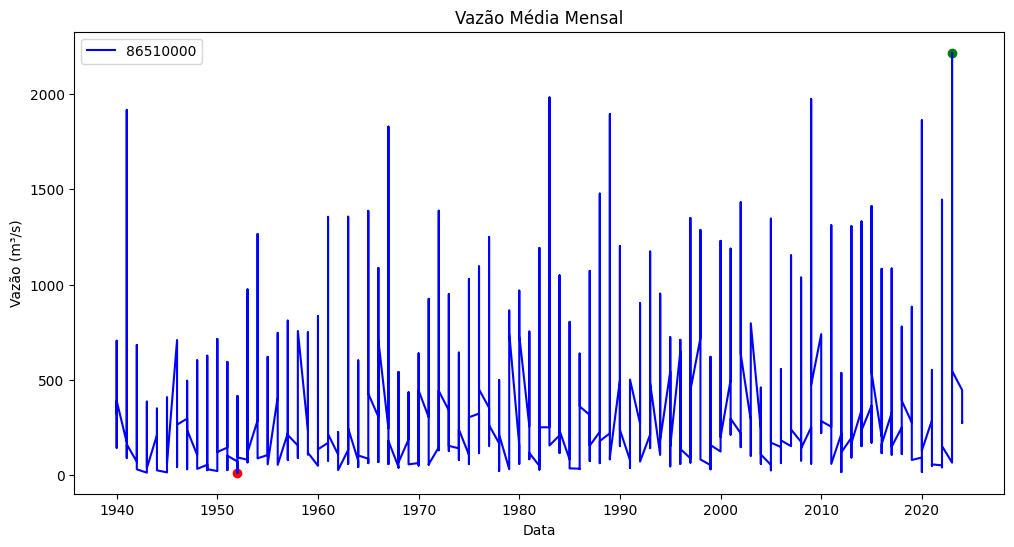

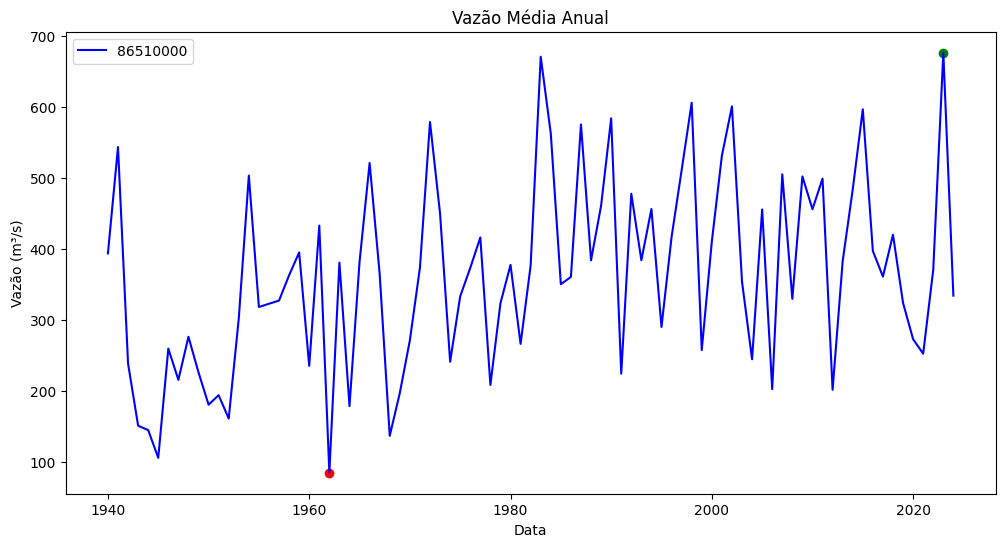

In [66]:
#Gerando os gráficos 
# Criar o lineplot para vazão diária
plt.figure(figsize=(12, 6))
plt.plot(vazao_diaria['Data'], vazao_diaria['Vazao'], color='blue',label=estacoes)
plt.title('Vazão Média Diária')
plt.xlabel('Data')
plt.ylabel('Vazão (m³/s)')
plt.legend()

# Adicionar manchas para os valores mínimos e máximos
min_vazao = vazao_diaria['Vazao'].min()
max_vazao = vazao_diaria['Vazao'].max()

# Pegar a primeira data onde o valor mínimo e máximo ocorrem
min_date = vazao_diaria['Data'][vazao_diaria['Vazao'] == min_vazao].iloc[0]
max_date = vazao_diaria['Data'][vazao_diaria['Vazao'] == max_vazao].iloc[0]

# Adicionar as manchas para os valores mínimos e máximos
plt.scatter(min_date, min_vazao, color='red', label='Mínimo')
plt.scatter(max_date, max_vazao, color='green', label='Máximo')

#Salvando a figura
plt.savefig(os.path.dirname(cwd) +'\\resultados\\'+str(estacoes)+'vazao_media_diaria.png')

# Criar o lineplot para vazão média mensal
plt.figure(figsize=(12, 6))
plt.plot(vazao_mensal['Ano'], vazao_mensal['Vazao'], label=estacoes, color='blue')
plt.title('Vazão Média Mensal')
plt.xlabel('Data')
plt.ylabel('Vazão (m³/s)')
plt.legend()
#Limita o número de rótulos no eixo X
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))


min_vazao = vazao_mensal['Vazao'].min()
max_vazao = vazao_mensal['Vazao'].max()
plt.scatter(vazao_mensal['Ano'][vazao_mensal['Vazao'] == min_vazao], min_vazao, color='red', label='Mínimo')
plt.scatter(vazao_mensal['Ano'][vazao_mensal['Vazao'] == max_vazao], max_vazao, color='green', label='Máximo')
plt.savefig(os.path.dirname(cwd) +'\\resultados\\'+str(estacoes)+'vazao_media_mensal.png')

# Criar o lineplot para vazão média anual
plt.figure(figsize=(12, 6))
plt.plot(vazao_anual['Ano'], vazao_anual['Vazao'], label=estacoes, color='blue')
plt.title('Vazão Média Anual')
plt.xlabel('Data')
plt.ylabel('Vazão (m³/s)')
plt.legend()

min_vazao = vazao_anual['Vazao'].min()
max_vazao = vazao_anual['Vazao'].max()
plt.scatter(vazao_anual['Ano'][vazao_anual['Vazao'] == min_vazao], min_vazao, color='red', label='Mínimo')
plt.scatter(vazao_anual['Ano'][vazao_anual['Vazao'] == max_vazao], max_vazao, color='green', label='Máximo')


plt.savefig(os.path.dirname(cwd) +'\\resultados\\'+str(estacoes)+'vazao_media_anual.png')

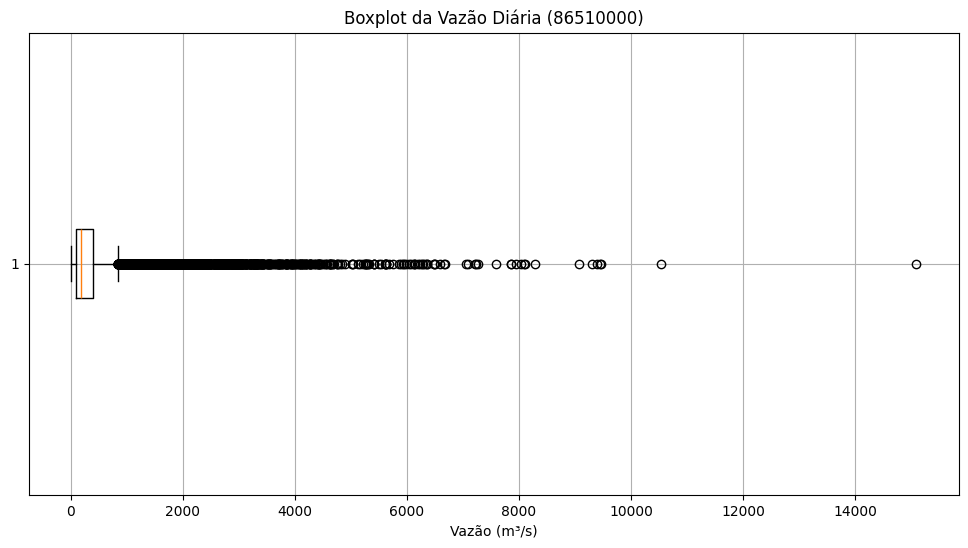

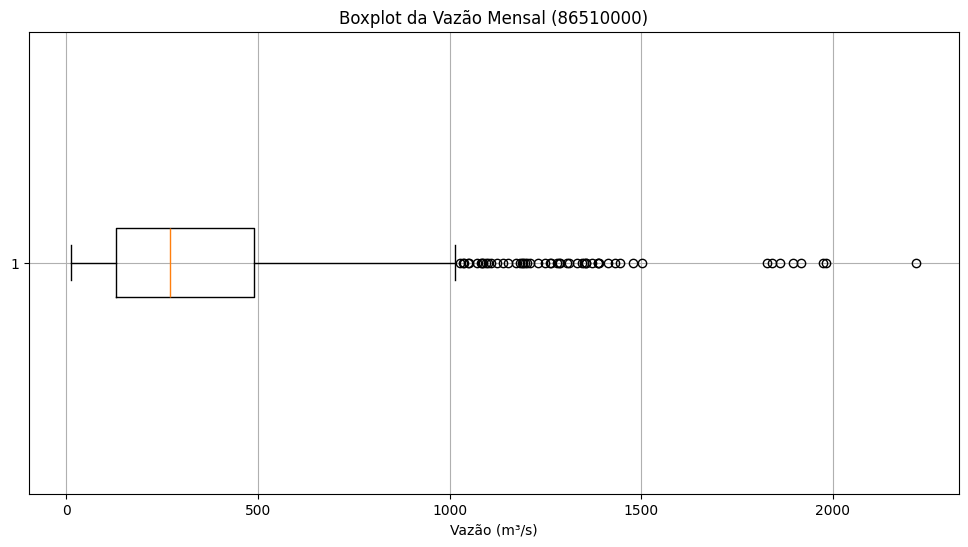

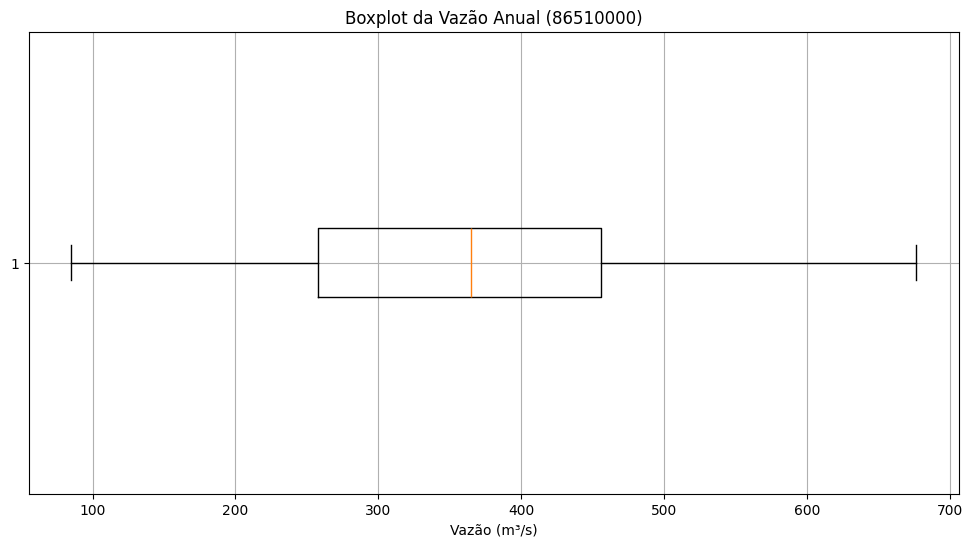

In [67]:
# Boxplot da série diária
plt.figure(figsize=(12, 6))
plt.boxplot(vazao_diaria['Vazao'], vert=False)
plt.title('Boxplot da Vazão Diária ('+str(estacoes)+')')
plt.xlabel('Vazão (m³/s)')
plt.grid()
plt.savefig(os.path.dirname(cwd) +'\\resultados\\'+str(estacoes)+'boxplot_vazao_diaria.png')

# Boxplot da série mensal
plt.figure(figsize=(12, 6))
plt.boxplot(vazao_mensal['Vazao'], vert=False)
plt.title('Boxplot da Vazão Mensal ('+str(estacoes)+')')
plt.xlabel('Vazão (m³/s)')
plt.grid()
plt.savefig(os.path.dirname(cwd) +'\\resultados\\'+str(estacoes)+'boxplot_vazao_mensal.png')
# Boxplot da série anual
plt.figure(figsize=(12, 6))
plt.boxplot(vazao_anual['Vazao'], vert=False)
plt.title('Boxplot da Vazão Anual ('+str(estacoes)+')')

plt.xlabel('Vazão (m³/s)')
plt.grid()
plt.savefig(os.path.dirname(cwd) +'\\resultados\\'+str(estacoes)+'boxplot_vazao_anual.png')

In [68]:
#Calculando as estatísticas para os dados
#estatísticas univariadas - média, mínimo, máximo, mediana, entre outros. Se o dado tiver resolução horária, estima as estatísticas univariadas nas horas do dia, dias da semana (segunda, terça, etc), mês do ano. Exporte as estatísticas em um arquivo .csv
vazao_media_diaria=vazao_diaria['Vazao'].mean()
vazao_max_diaria=vazao_diaria['Vazao'].max()
vazao_min_diaria=vazao_diaria['Vazao'].min()
vazao_diaria_mediana=vazao_diaria['Vazao'].median()

#Calculando a média mensal para cada mês
# Extrair o mês da coluna de data
vazao_diaria.loc[:,'Mes'] = vazao_diaria['Data'].dt.month

# Agrupar os dados por ano e calcular a média de vazão para cada ano
media_mes = vazao_diaria.groupby('Mes')['Vazao'].mean().reset_index()

#Gerando um arquivo com as estatísticas
path = os.path.join(os.path.dirname(cwd), 'resultados')
file_path = os.path.join(path, f'{estacoes}_estatisticas.txt')
with open(file_path, 'w') as file:
    print('Estatisticas da estacao '+ str(estacoes), file=file)
    print('Vazao media diaria = ' + str(vazao_media_diaria), file=file)
    print('Vazao maxima diaria = ' + str(vazao_max_diaria), file=file)
    print('Vazao minima diaria = ' + str(vazao_min_diaria), file=file)
    print('Mediana das vazoes diaria = ' + str(vazao_diaria_mediana), file=file)
    print('\nMedia Mensal de Vazao:\n', file=file)
    print(media_mes.to_string(index=False), file=file)

Mann_Kendall_Test(trend='increasing', h=np.True_, p=np.float64(3.974390350158785e-08), z=np.float64(5.491985942550729), Tau=np.float64(0.11535094162235214), s=np.float64(58893.0), var_s=114988331.66666667, slope=np.float64(0.12346874956461157), intercept=np.float64(208.09794480320454))


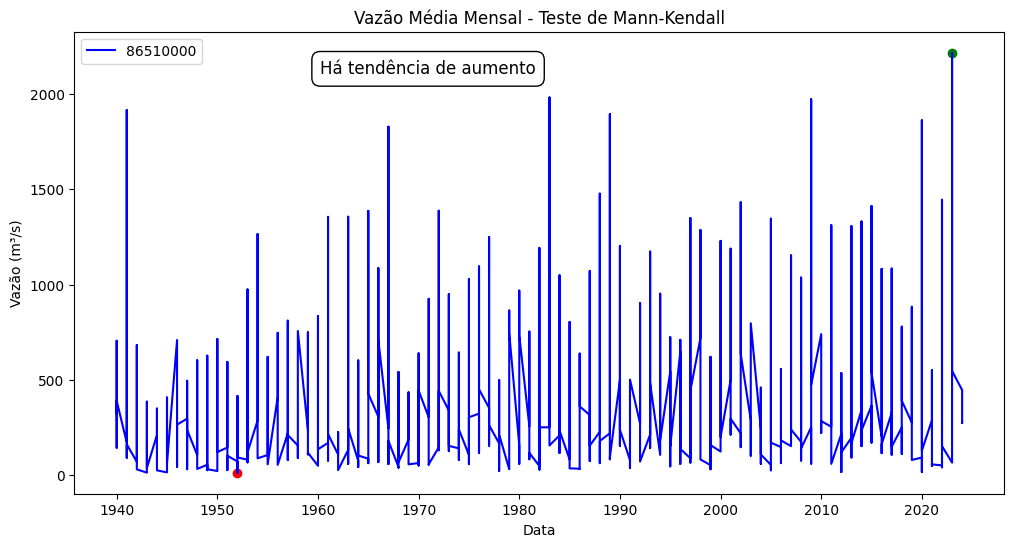

In [70]:
#Teste de Mann-Kendall
resultado_mk=mk.original_test(vazao_mensal['Vazao'])
print(resultado_mk)
if resultado_mk[0]=='no trend':
    tendencia='Não há tendência significativa'
elif resultado_mk[3]>0:
    tendencia=('Há tendência de aumento')
else:tendencia=('Há tendência de redução')

p_value=resultado_mk[2]*100

#Gerando um arquivo com os resultados do teste de Mann Kendall
path = os.path.join(os.path.dirname(cwd), 'resultados')
file_path = os.path.join(path, f'{estacoes}_resuktado_Mann_Kendall.txt')
with open(file_path, 'w') as file:
    print('Esses são os resultados do teste de Mann Kendall para a estação '+str(estacoes), file=file)
    print(str(tendencia), file=file)
    print('p-value = ' + str(resultado_mk[2]), file=file)
    print('O p-value indica a probabilidade de que a tendência observada na série temporal seja devida ao acaso. Um valor-p menor que um nível de significância predefinido (comum usar 0.05) sugere que a tendência observada é estatisticamente significativa.', file=file)
    print('No nosso caso, há '+f"{p_value:.0f}%" +' de chance de que a tendência seja aleatória', file=file)
    print('z-score = ' + str(resultado_mk[3]), file=file)
    print('O valor do z-score indica a direção e a intensidade da tendência', file=file)
    print('Se z>0 há tendência de aumento', file=file)
    print('Se z<0 há tendência de redução', file=file)


# Criando a figura com o resultado do teste de Mann-Kendall
plt.figure(figsize=(12, 6))
plt.plot(vazao_mensal['Ano'], vazao_mensal['Vazao'], label=estacoes, color='blue')
plt.title('Vazão Média Mensal - Teste de Mann-Kendall')
plt.xlabel('Data')
plt.ylabel('Vazão (m³/s)')
plt.legend()
plt.text(
    x=len(vazao_mensal) * 0.02, 
    y=max_vazao * 0.95, 
    s=tendencia, 
    fontsize=12, 
    color="black",
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)



min_vazao = vazao_mensal['Vazao'].min()
max_vazao = vazao_mensal['Vazao'].max()
plt.scatter(vazao_mensal['Ano'][vazao_mensal['Vazao'] == min_vazao], min_vazao, color='red', label='Mínimo')
plt.scatter(vazao_mensal['Ano'][vazao_mensal['Vazao'] == max_vazao], max_vazao, color='green', label='Máximo')
#Limita o número de rótulos no eixo X
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))

plt.savefig(os.path.dirname(cwd) +'\\resultados\\'+str(estacoes)+'vazao_mensal_Mann_Kendall.png')

3.974390350158785e-06
